## Table of Contents
1. [Load Data](#Load-Data-And-Analysis)
2. [Preprocessing](#preprocessing)
3. [Model Selection](#model-selection)
4. [Visualization](#visualization)
5. [Summary & Key Insights](#-Notebook-Summary-&-Key-Insights)

# Load Data And Analysis 

In [3]:
import kagglehub

path = kagglehub.dataset_download("gpreda/bbc-news")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\AIJimmy\.cache\kagglehub\datasets\gpreda\bbc-news\versions\1007


In [4]:
import pandas as pd

df = pd.read_csv(path + '/bbc_news.csv')

df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [5]:
df.drop(columns=['pubDate','link','guid'], inplace=True)
df.head()

,title,description
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...


# Preprocessing

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from num2words import num2words
from nltk.corpus import wordnet
import contractions
from nltk.corpus import stopwords
import re 

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [8]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [9]:
def preprocess_text(text):
    text = text.lower()
    expanded_text = contractions.fix(text)
    split_dot_text = expanded_text.replace('.', ' . ')
    html_tag_filter = re.sub(r'<[^>]*>', '', split_dot_text)
    a_z_digits_string_only = re.sub(r'[^a-zA-Z0-9]+', ' ', html_tag_filter)
    converted_num = "".join(num2words(int(word)) if word.isdigit() else word for word in a_z_digits_string_only)
    word_tokens = word_tokenize(converted_num)
    remove_stop_words = [w for w in word_tokens if not w in stop_words]
    tagged = nltk.tag.pos_tag(remove_stop_words)
    
    lemmatized_words = []
    for word, tag in tagged:
        wordnet_pos = get_wordnet_pos(tag) or wordnet.NOUN
        lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_words.append(lemmatized_word)
    
    return lemmatized_words


In [10]:
df["preprocessed_title"] = df["title"].apply(preprocess_text)
df["preprocessed_description"] = df["description"].apply(preprocess_text)

In [11]:
texts = df['preprocessed_title'] + df['preprocessed_description']
texts

0        [ukraine, angry, zelensky, vow, punish, russia...
1        [war, ukraine, take, cover, town, attack, jere...
2        [ukraine, war, catastrophic, global, food, one...
3        [manchester, arena, bomb, saffie, roussos, par...
4        [ukraine, conflict, oil, price, soar, high, le...
                               ...                        
42110    [highlight, wale, make, history, dublin, watch...
42111    [gang, jail, twozerozerom, cocaine, banana, bo...
42112    [scottish, budget, present, huge, challenge, s...
42113    [celebration, wale, make, history, qualifying,...
42114    [school, tell, muslim, girl, safe, three, chil...
Length: 42115, dtype: object

In [12]:
from gensim import corpora

corpus = [' '.join(text) for text in texts.tolist()]
dictionary = corpora.Dictionary(texts)
gensim_corpus = [dictionary.doc2bow(text) for text in texts]

print("dictionary",dictionary)

dictionary Dictionary<30864 unique tokens: ['angry', 'atrocity', 'civilian', 'country', 'forget']...>


# Model selection

In [13]:
from gensim.models import LdaModel , CoherenceModel

lda_model = LdaModel(corpus=gensim_corpus, id2word=dictionary, num_topics=10, random_state=42, passes=20)
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
print("Number of topics:", 10, "LDA Coherence Score:", coherence_model_lda.get_coherence())

Number of topics: 10 LDA Coherence Score: 0.3895565982764177


In [19]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

nmf = NMF(n_components=10, random_state=42, init='nndsvd', max_iter=500)
nmf.fit(tfidf)

NMF(init='nndsvd', max_iter=500, n_components=10, random_state=42)

In [20]:
import numpy as np
W = nmf.fit_transform(tfidf)
H = nmf.components_
feature_names = np.array(vectorizer.get_feature_names_out())
topics = [[feature_names[i] for i in topic.argsort()[:-6:-1]] for topic in H]

coherence_model = CoherenceModel(
    topics=topics,
    texts=texts,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print("NMF Coherence Score:", coherence_score)

NMF Coherence Score: 0.8357806750427382


In [16]:
def display_nmf_topics_summary(nmf_model, feature_names, num_words=10):
    topics = []
    
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_indices = topic.argsort()[-num_words:][::-1]
        top_words = ', '.join([feature_names[i] for i in top_indices])
        topics.append({
            'topic': topic_idx,
            'top_words': top_words
        })
    
    return pd.DataFrame(topics)

# Display concise topic summary
topics_summary = display_nmf_topics_summary(nmf, feature_names, num_words=12)
print(topics_summary)

   topic                                          top_words
0      0  say, year, police, old, woman, find, die, man,...
1      1  world, cup, final, twozerotwotwo, woman, semi,...
2      2  ukraine, war, russia, russian, ukrainian, puti...
3      3  rise, price, rate, cost, uk, energy, living, b...
4      4  election, party, minister, sunak, labour, tory...
5      5  day, seven, week, past, go, quiz, closely, att...
6      6  league, city, manchester, premier, win, one, c...
7      7  israel, gaza, hamas, attack, israeli, hostage,...
8      8  england, euro, test, twozerotwofour, win, wale...
9      9  strike, train, rail, worker, union, pay, actio...


In [21]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(nmf, f)

# Visualization

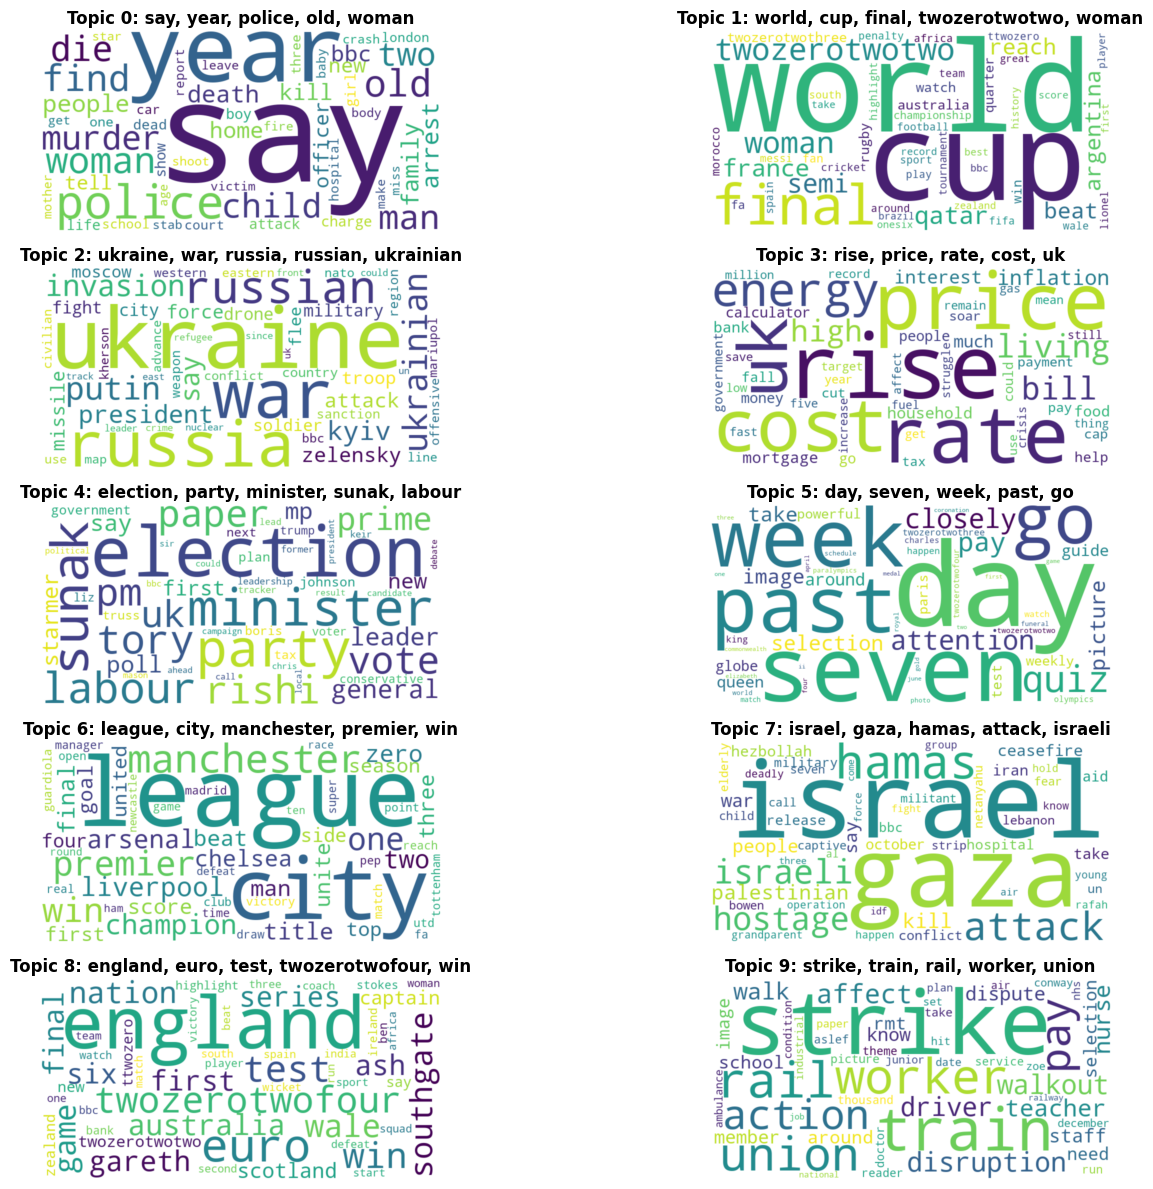

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_nmf_topic_wordclouds(nmf_model, feature_names, num_topics=None, words_per_topic=50, figsize=(16, 12)):
    n_topics = nmf_model.n_components
    num_topics = num_topics or n_topics
    
    # Calculate grid dimensions
    n_cols = 2
    n_rows = (num_topics + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(nmf_model.components_[:num_topics]):
        # Get top word indices and their weights
        top_indices = topic.argsort()[-words_per_topic:][::-1]
        top_words = feature_names[top_indices]
        top_weights = topic[top_indices]
        
        # Create word frequency dictionary
        word_freq = {word: weight for word, weight in zip(top_words, top_weights)}
        
        # Generate word cloud
        wc = WordCloud(
            width=800, 
            height=400, 
            background_color='white',
            colormap='viridis',
            relative_scaling=0.5,
            min_font_size=10
        ).generate_from_frequencies(word_freq)
        
        # Display
        ax = axes[topic_idx]
        ax.imshow(wc, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f"Topic {topic_idx}: {', '.join(top_words[:5])}", fontsize=12, fontweight='bold')
    
    # Hide unused subplots
    for idx in range(num_topics, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Usage:
# Display word clouds for all 10 topics
show_nmf_topic_wordclouds(nmf, feature_names, figsize=(16, 12))

# Notebook Summary & Key Insights

## Summary
- Goal: discover hidden topics/themes from a collection of news articles (BBC dataset). The notebook demonstrates a practical pipeline: data load → text cleaning → tokenization & lemmatization → create dictionary & corpus → train topic models (LDA, NMF) → evaluate coherence → visualize with pyLDAvis.

## Data & Preprocessing
- Combined title and description into a single `text_combined` column and tokenized into `tokens`.
- Preprocessing steps used: lowercasing, punctuation/HTML removal, contraction expansion, number→words (where used), stopword removal, POS-aware lemmatization (WordNet), and filtering short tokens.
- Notes: check for and remove any empty documents after cleaning before building dictionary/corpus.

## Modeling Summary
- LDA (gensim) was trained on the bag-of-words corpus. Default example used num_topics = 8 and multiple passes.
- NMF (scikit-learn with TF‑IDF) was used as an alternate non-probabilistic method; topics were extracted from the NMF `components_` matrix.
- Coherence (c_v) was computed for LDA (and optionally for NMF-derived topics) to provide a quantitative quality check.

## Visualization
- Topics visualized with pyLDAvis for interactive exploration of topic-term relationships and document-topic distributions.
- A helper table/function prints top-n words per topic for quick inspection.

## Key Findings & Practical Notes
- Coherence helps select a reasonable `num_topics` — run a small grid (e.g., 4–20) and pick the number with the best coherence while preserving interpretability.
- LDA gives probabilistic topic assignments (good for soft clustering); NMF on TF‑IDF often yields more coherent sparse topics for short documents.
- If training is slow, use `LdaMulticore` (gensim) and tune `passes`, `iterations`, and `chunksize` for speed/quality tradeoffs.
- pyLDAvis expects a gensim bag-of-words corpus (list of (term_id, count) tuples). If you see errors, confirm `corpus` is correctly built with `dictionary.doc2bow(...)`.
